<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Введение

Перед нами предстоит датасет из 10тысяч клиентов.В нем отражено социально экономические портреты каждого клиента.Мы изучим данные,проведем исследовательский анализ данных и подготовим модель машинного обучения для предсказывания - уйдет ли клиент из банка или нет.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from sklearn.utils import shuffle

## Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [187]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Пропуски в Neture - я считаю что это не пропуск а значение 0 лет клиент с банком.Чуть позже заменим значение

In [188]:
df.loc[df['Tenure'].isna(),'Tenure'] = 0

In [189]:
data_start = df

In [190]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

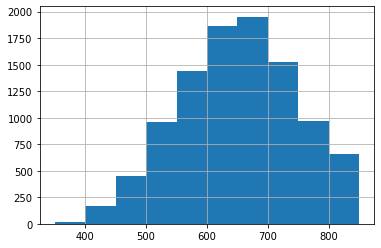

In [191]:
df.CreditScore.hist()
plt.show()

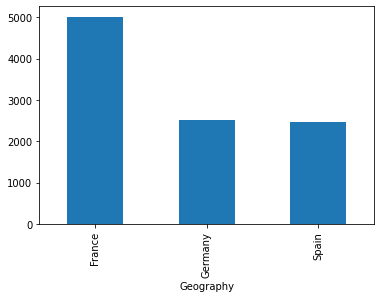

In [192]:
df.groupby('Geography')['CustomerId'].count().plot(kind='bar')
plt.show()

Видим что преобладают граждане Франции.Всего 3 нации представлено.Ну и хватит


In [193]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

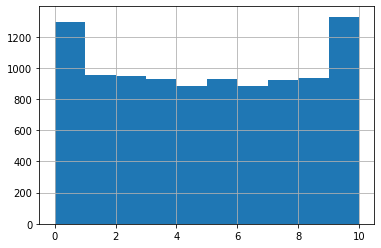

In [194]:
df.Tenure.hist()
plt.show()

Клиенты распределены равномерно по длительности нахождения в банке

In [195]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Клиенты частенько пользуются кредитками

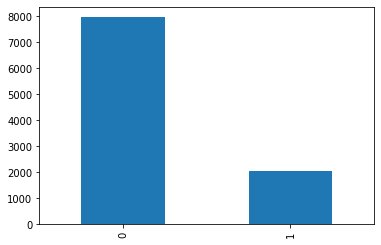

In [196]:
df.Exited.value_counts().plot(kind='bar')
plt.show()

Видим сильный дисбаланс классов.Еще не все клиенты ушли из банка))Ждем rollaout

## Исследование задачи

In [197]:
df.columns
df = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

Обрезаю всякие не нужные стобцы типо CustomerID,rowID и тд

In [198]:
conteiner = df
data = conteiner

сохраню первоначальные данные в переменную, откуда буду их заново обновлять и использовать

In [199]:
data = pd.get_dummies(data,drop_first=True)

Исследовать задачу я буду на LogisticRegression и RandomFOrestCLassifier. DT ввиду ее слабости даже пробовать не буду

Буду использовать кодировку OHE.OrdinalEncoder очень опасная,по наставлению наставников исползовать ее не буду

In [200]:
train,test = train_test_split(data,test_size = 0.4,random_state=1)
val, test = train_test_split(test,test_size = 0.5,random_state=1)
fet_tr = train.drop('Exited',axis=1)
tar_tr = train['Exited']
fet_val = val.drop('Exited',axis=1)
tar_val = val['Exited']
fet_test = test.drop('Exited',axis=1)
tar_test = test['Exited']

Комплекты данных подготовленны.Качество разбивки проверил,ячейки с разбивками удалил что бы тетрадь не увеличивать в размерах

In [201]:
metricks_train = []#Здесь мы соберем метрику Трейна что бы потом на графике посмотреть ключевые метрики
metricks_val = []#Здесь мы соберем метрику валидации что бы потом на графике посмотреть ключевые метрики
f1_mera_val = []#Здесь мы соберем метрику Ф1меры что бы потом на графике посмотреть как изменяется Ф1Мера
metricks_auc = []#Здесь мы соберем метрику Ф1меры что бы потом на графике посмотреть как изменяется Ф1Мера
best_model = ''
best_score = 0
best_f1_model = ''
best_f1_mera = 0
best_model_auc = ''
best_auc_score = 0
for i in range(1,25):#Увеличим глубину
    for j in range(1,30):  #Увеличим кол во оценщиков
        model = RandomForestClassifier(max_depth=i,n_estimators=j,random_state=1)#Начнем с RandomForesta
        model.fit(fet_tr,tar_tr)
        predictions_val=model.predict(fet_val)#Смотрим качество обучения на Валиде
        predictions_tr=model.predict(fet_tr)#Смотрим качесво обучения на Трейне
        accuracy_score_counted_for_train = accuracy_score(tar_tr,predictions_tr)#Accuracy на Трейне
        accuracy_score_counted_for_valid = accuracy_score(tar_val,predictions_val)#Accuracy на Валиде
        f1_mera_counted = f1_score(tar_val,predictions_val)#Считаем F1
        predict_prob = model.predict_proba(fet_val)#Тут собираю вероятности для ROC-AUC
        predict_proba_pos = predict_prob[:,1]
        auc_score = roc_auc_score(tar_val,predict_proba_pos)
        roc_auc_count = roc_auc_score(tar_val,predict_proba_pos)
        print('accuracy_score',accuracy_score_counted_for_valid,'глубина дерева=',i,'кол-во леса',j,'f1=',f1_mera_counted,'roc_auc=',roc_auc_count)
        metricks_val.append(accuracy_score_counted_for_valid)
        metricks_train.append(accuracy_score_counted_for_train)
        f1_mera_val.append(f1_mera_counted)
        metricks_auc.append(roc_auc_count)
        if accuracy_score_counted_for_valid > best_score:
            best_score = accuracy_score_counted_for_valid
            best_model = model
        if f1_mera_counted > best_f1_mera:
            best_f1_model = model
            best_f1_mera = f1_mera_counted
        if roc_auc_count > best_auc_score:
            best_model_auc = model
            best_auc_score = roc_auc_count    

accuracy_score 0.7895 глубина дерева= 1 кол-во леса 1 f1= 0.0 roc_auc= 0.6785564392509165
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 2 f1= 0.0 roc_auc= 0.7130802290754994
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 3 f1= 0.0 roc_auc= 0.7130802290754994
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 4 f1= 0.0 roc_auc= 0.735516179547776
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 5 f1= 0.0 roc_auc= 0.7346903163402075
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 6 f1= 0.0 roc_auc= 0.764292773772149
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 7 f1= 0.0 roc_auc= 0.7680497744295302
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 8 f1= 0.0 roc_auc= 0.7793358194473485
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 9 f1= 0.0 roc_auc= 0.7855124940015855
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 10 f1= 0.0 roc_auc= 0.7846851264894494
accuracy_score 0.7895 глубина дерева= 1 кол-во леса 11 f1= 0.0 roc_auc= 0.7840999520126842
accuracy_s

In [202]:
best_model # accuracy

RandomForestClassifier(max_depth=9, n_estimators=18, random_state=1)

In [203]:
best_f1_model

RandomForestClassifier(max_depth=15, n_estimators=11, random_state=1)

In [204]:
best_model_auc

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=1)

Тут у нас получились разные модели в лидерах для разных метрик.

In [205]:
best_score

0.866

In [206]:
best_f1_mera

0.6017191977077364

In [207]:
best_auc_score

0.863173721604371

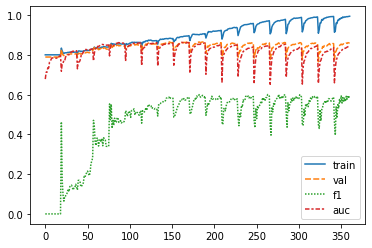

In [208]:
metricks_train = pd.Series(metricks_train)
metricks_val = pd.Series(metricks_val)
f1_mera_counted = pd.Series(f1_mera_val)
metricks_auc = pd.Series(metricks_auc)
data_metricks = pd.DataFrame({'train':metricks_train,'val':metricks_val,'f1':f1_mera_counted,'auc':metricks_auc})
sns.lineplot(data=data_metricks)
plt.show()

Предыдущий ревьювер рекомендовал все ключевые метрики сохранять и выводить в график для изучения каждой итерации.Лично я в этом пока пользы не увидел.Может сейчас что путного услышу)

In [209]:
421 / (1579+421)

0.2105

Вероятность наугад дать правильный ответ 21% , наша модель дает 86% точность.Значит она вменяема

Сразу же побежим на этих же данных через модель LinearLogistic

In [68]:
conteiner = df
data = conteiner
data = data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
data = pd.get_dummies(data,drop_first=True)
data.loc[data['Tenure'].isna(),'Tenure'] = 0
features = data.drop('Exited',axis=1)
target = data['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12344)
row = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[row])
features_train[row] = scaler.transform(features_train[row])
features_valid[row] = scaler.transform(features_valid[row])

In [73]:
model = LogisticRegression(solver='liblinear')
model.fit(features_train,target_train)
answers = model.predict(features_valid)
accuracy_score(target_valid,answers)

0.791

Логистическая регрессия показывает более худшие результаты.Остановимся на RandomForest с кодировкой OHE

Сделал,спасибо за совет.Для линейных моделей буду масштабировать масштаб.Но в данной ситуации рендом форес все равно лучше

## Борьба с дисбалансом

Применим несколько способов борьмы с дисбалансом:upsampling,downsampling

Качество разбиения проверено,разбивка на таргеты и фичи проверены.Ячейки с проверкой удалил что бы не увеличивать тетрадь

In [81]:
def upsample(features,target,repeat):
    features_one = features[target == 1]
    features_zero = features[target == 0]
    target_one = target[target == 1]
    target_zero = target[target == 0]
    features_concate = pd.concat( ([features_one]*repeat) + [features_zero] ) 
    target_concate = pd.concat( ([target_one]*repeat) + [target_zero] )
    features_concate,target_concate = shuffle(features_concate,target_concate,random_state=1)
    return features_concate,target_concate
features_concate_train,target_concate_train = upsample(fet_tr,tar_tr,4) 

Сначала увеличим содержание едениц в таргете в 4 раза,что бы получить +- 50% нулей и еденицы

In [82]:
best_model=0
best_score_accuracy=0
best_score_f1 = 0
for i in range(1,30):#Меням гиперпараметры случайного леса ,вторая попытка
    for j in range(1,30)::#Меням гиперпараметры случайного леса,вторая попытка
        model = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=1)
        model.fit(features_concate_train,target_concate_train)
        answers = model.predict(fet_val)
        accuracy_upsampled = accuracy_score(answers,tar_val)
        f1_upsampled = f1_score(answers,tar_val)
        if f1_upsampled > best_score_f1:
            best_model =model
            best_score_f1 = f1_downsampled


In [83]:
accuracy_upsampled

0.8375

In [84]:
f1_upsampled

0.5880861850443599

Увеличение едениц не дает прирост ф1 меры

In [76]:
def downsampled(features,target,fraction):
    features_one = features[target == 1]
    features_zero = features[target == 0]
    target_one = target[target == 1]
    target_zero = target[target == 0]
    
    features_fraction = features_zero.sample(frac=fraction,random_state=1)
    target_fraction = target_zero.sample(frac=fraction,random_state=1)
    
    data_features = pd.concat([features_fraction] + [features_one])
    data_target = pd.concat([target_fraction] + [target_one])
    
    data_features,data_target = shuffle(data_features,data_target,random_state=1)
    return  data_features,data_target
fet_downsampled,tar_downsampled = downsampled(fet_tr,tar_tr,0.25)
    
    

Качество разбивки,соеденения проверено.Ячейки удалил.Теперь я убавил кол-во нулей,для того что бы получить 50 на 50 баланс классов

In [77]:
best_model=0
best_score_accuracy=0
best_score_f1 = 0
for i in range(1,25):#Еще раз меняем параметры модели
    for j in range(1,25):#Еще раз меняем параметры модели
        model = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=1)
        model.fit(fet_downsampled,tar_downsampled)
        answers = model.predict(fet_val)
        accuracy_downsampled = accuracy_score(answers,tar_val)
        f1_downsampled = f1_score(answers,tar_val)
        if f1_downsampled > best_score_f1:
            best_model =model
            best_score_f1 = f1_downsampled


In [78]:
best_model

RandomForestClassifier(max_depth=5, n_estimators=12, random_state=1)

In [79]:
best_score_f1

0.6111655239960824

In [ ]:
Уменьшиние нулей не дает прирост ф1 меры

## Тестирование модели


Время обьеденить выборки

In [133]:
train_val = pd.concat([train]+[val])
train_val = shuffle(train_val,random_state=1)
train_val_features=train_val.drop('Exited',axis=1)
train_val_target = train_val['Exited']


Соеденение проверил.

In [226]:
model = RandomForestClassifier(max_depth=9, n_estimators=18, random_state=1,class_weight='balanced')
model.fit(train_val_features,train_val_target)
answers = model.predict(fet_test)
accuracy_downsampled = accuracy_score(answers,tar_test)
f1_downsampled = f1_score(answers,tar_test)

In [227]:
f1_downsampled

0.6210892236384705

In [228]:
accuracy_downsampled

0.8365

Class_weight='balanced' дает почти 8 процентов улучшения F1Меры.Круто

Итог:Я провел работу над датасетом,провел небольшой EDA,отобрал лучшую модель и с ней пошел работать над дисбалансом классов.Увеличение и уменьшение выборки не дали никакого результата.Самый лучший эффект дал class_weight='balanced'.Итоговая F1 мера составила 0.621 что достаточно для выполнения проекта.